<center>
    <h1><font color=darkred>Machine learning in action </font></h1>
    <h1><font color=darkred> EDA </font></h1>
    <h3>Le Hai Phu</h3>
    <h4>Student name:    </h4>
    <hr>
    <h1>Exercise 2: Exploratory Data Analysis and Feature Engineering - Sales </h1>
    <h3>July 2024</h3>
</center





Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset: Advertising Budget and Sales.xlsx using read_excel

In [4]:
data = pd.read_excel('/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/Advertising Budget and Sales.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check some first rows

In [ ]:
data.head(10)

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1,4.8
9,199.8,2.6,21.2,10.6


Numbers of rows and cols

In [ ]:
data.shape

(208, 4)

Column names

In [ ]:
data.columns.values

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

Rename columns: 'TV','Radio','Newspaper', 'Sales'

In [6]:
data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']

Types of columns using dtypes

In [ ]:
data.dtypes

TV           float64
Radio        float64
Newspaper     object
Sales        float64
dtype: object

Newspaper col has object type => there may be some strings??? Please check them

In [ ]:
for i in data['Newspaper']:
  if type(i) != int and type(i) != float:
    print(i)

?
?


Replace strange symbols with np.NaN

In [7]:
data['Newspaper'] = data['Newspaper'].replace('?', np.NaN)


Remove duplicates

In [8]:
print(data.duplicated().sum())
data = data.drop_duplicates()

6


Reset index, drop old indexes

In [9]:
data.reset_index(drop=True, inplace=True)

Check missing data and fill them with mean or median

In [ ]:
data.isnull().sum()

TV           7
Radio        4
Newspaper    2
Sales        0
dtype: int64

In [10]:
data['TV'] = data['TV'].fillna(data['TV'].mean())


<ipython-input-10-e316dede8049>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TV'] = data['TV'].fillna(data['TV'].mean())


In [11]:
# Check for missing data
data.isnull().sum()

TV           0
Radio        4
Newspaper    2
Sales        0
dtype: int64

In [12]:
# Fill other columns with median
data["Radio"] = data["Radio"].fillna(data["Radio"].median())
data["Newspaper"] = data["Newspaper"].fillna(data["Newspaper"].median())

<ipython-input-12-92f2b530ddd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Radio"] = data["Radio"].fillna(data["Radio"].median())
<ipython-input-12-92f2b530ddd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Newspaper"] = data["Newspaper"].fillna(data["Newspaper"].median())


In [13]:
# Check for missing data
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
#Change type of Newspaper
data['Newspaper'] = data['Newspaper'].apply(pd.to_numeric, errors='coerce')

<ipython-input-14-abf01d86208b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Newspaper'] = data['Newspaper'].apply(pd.to_numeric, errors='coerce')


In [ ]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Plots and outliers

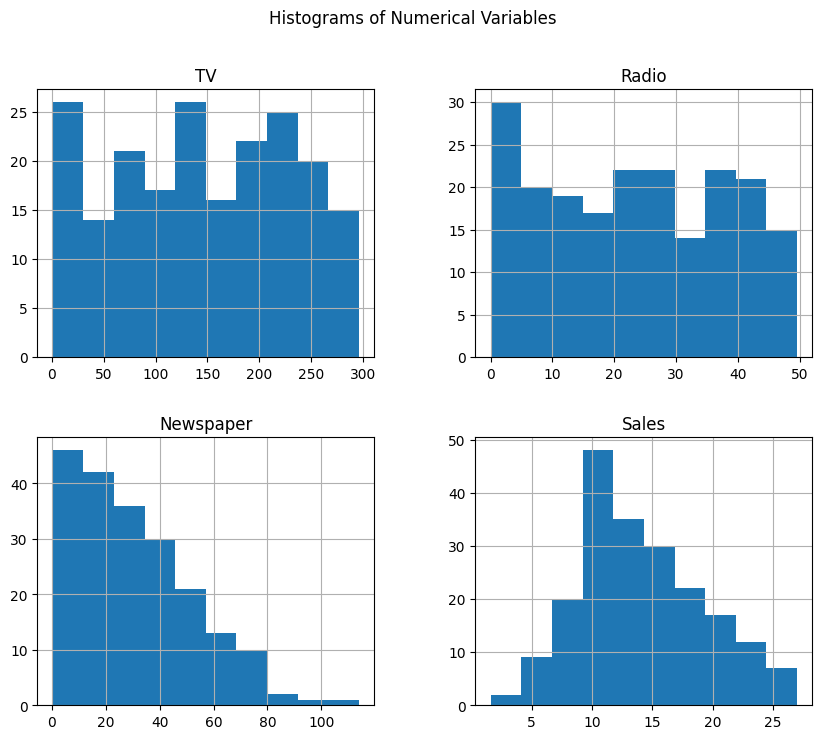

In [15]:
# Create histograms for numerical variables
data.hist(figsize=(10, 8), bins=10)
plt.suptitle('Histograms of Numerical Variables')
plt.show()

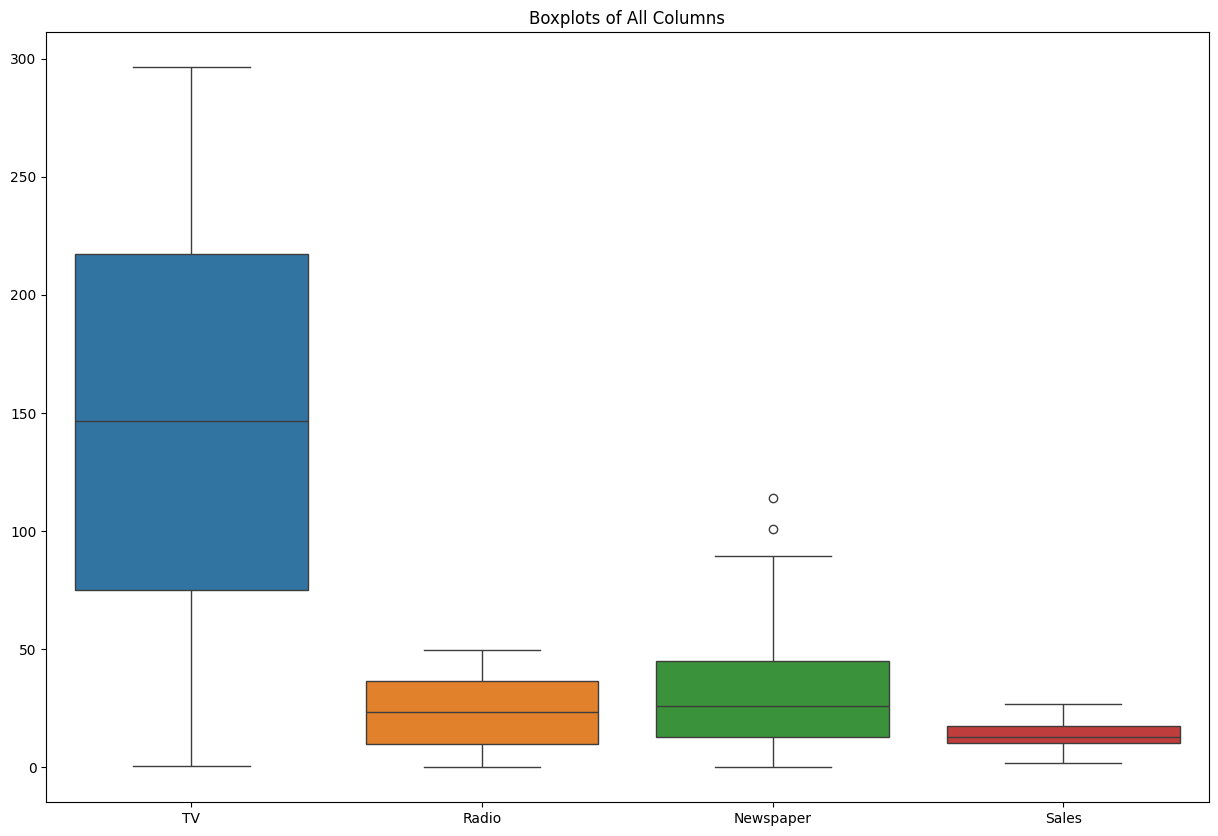

In [16]:
# Create boxplots to observe the distribution of numerical values
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title('Boxplots of All Columns')
plt.show()

METHOD 1: REMOVE OUTLIERS

In [17]:
# create some copies of the dataset for trials
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

In [18]:
from functools import update_wrapper
# Newspaper outliers
q1 = data1['Newspaper'].quantile(0.25)
q3 = data1['Newspaper'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
print(upper)


93.32500000000002


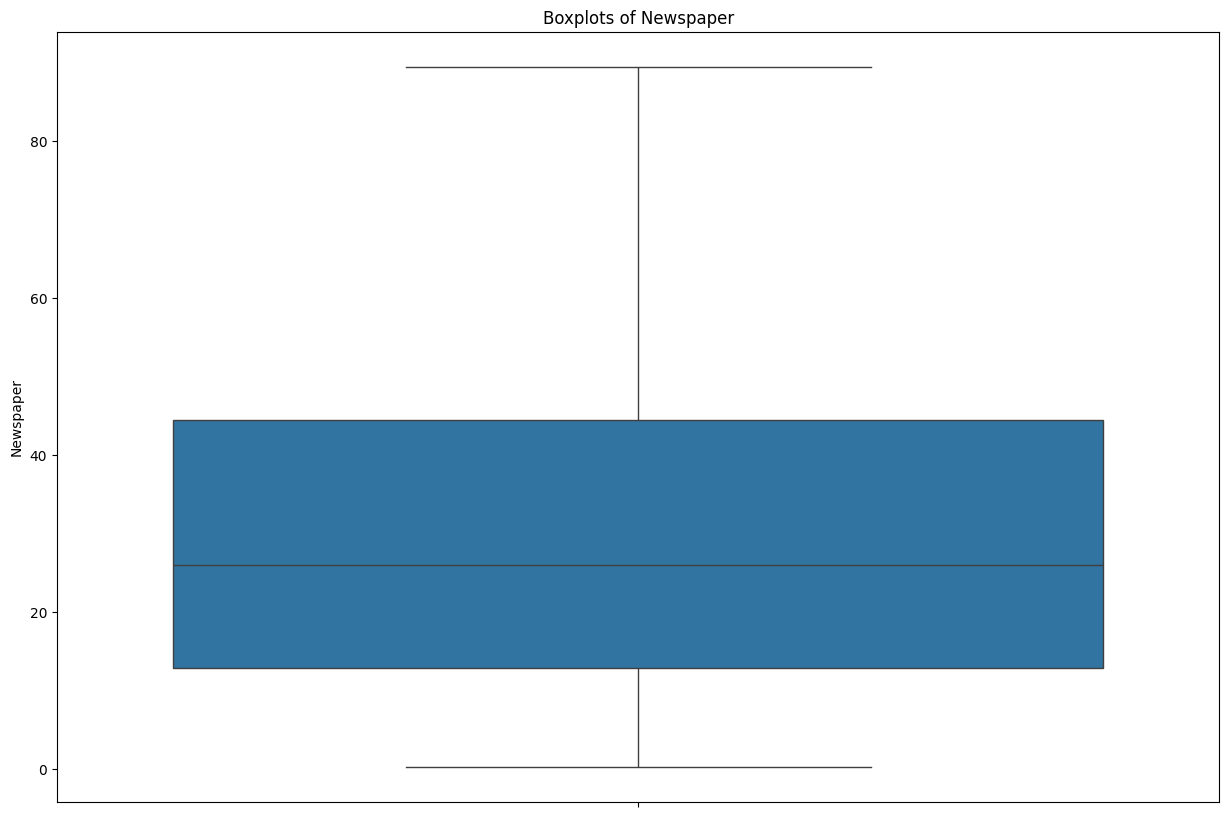

In [19]:
# Create boxplots to observe the distribution of numerical values
data1 = data1[data1['Newspaper'] < upper]
plt.figure(figsize=(15, 10))
sns.boxplot(data=data1['Newspaper'])
plt.title('Boxplots of Newspaper')
plt.show()

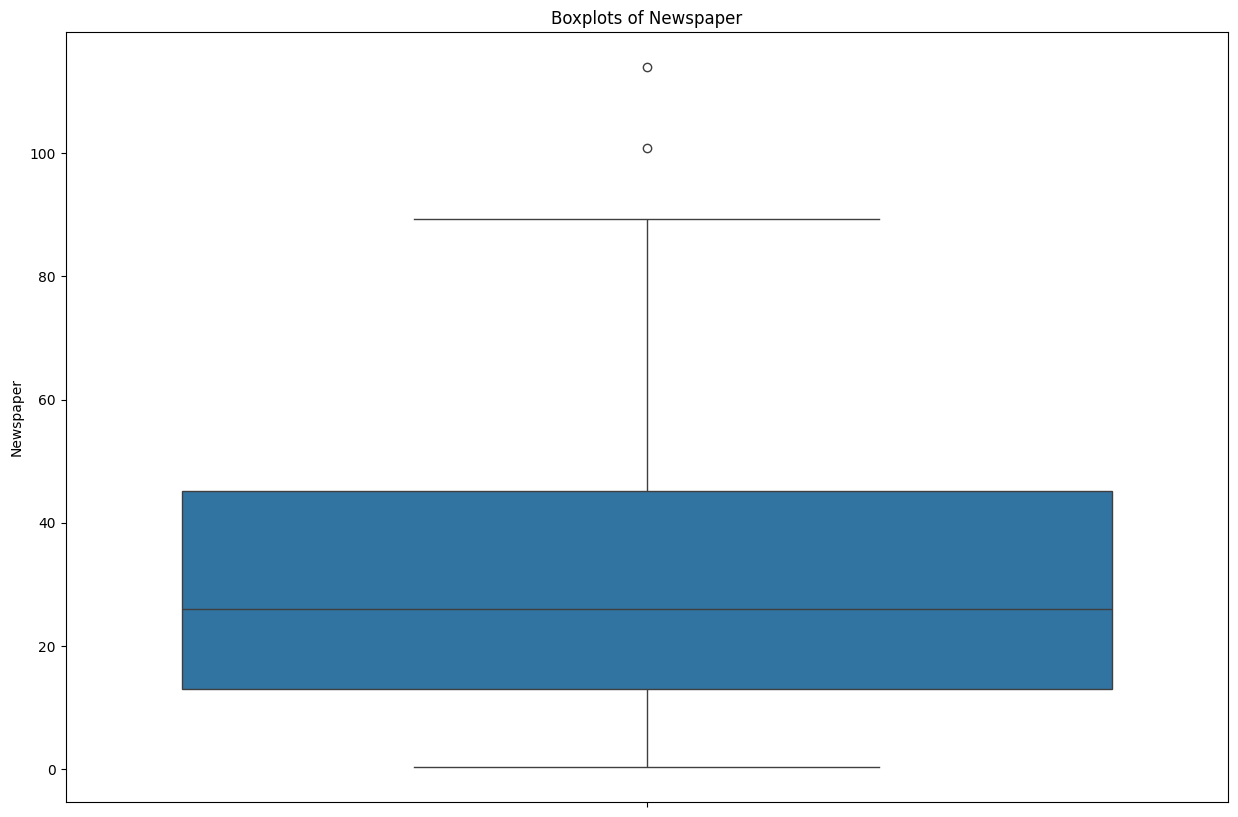

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data2['Newspaper'])
plt.title('Boxplots of Newspaper')
plt.show()

METHOD 2: CAPPING OUTLIERS (data1)
If any observation > upper limit => that observation = upper limit


In [21]:
# data2['Newspaper'] = np.where(data2['Newspaper'] > upper,
#    upper,
#    np.where(
#        data2['Newspaper'] < minw,
#        minw,
#        data1['Newspaper']
#    )
# )
# Or if you just want to cap upper limit

data2['Newspaper'] = np.where(data2['Newspaper'] > upper,
   upper, data2['Newspaper']
)


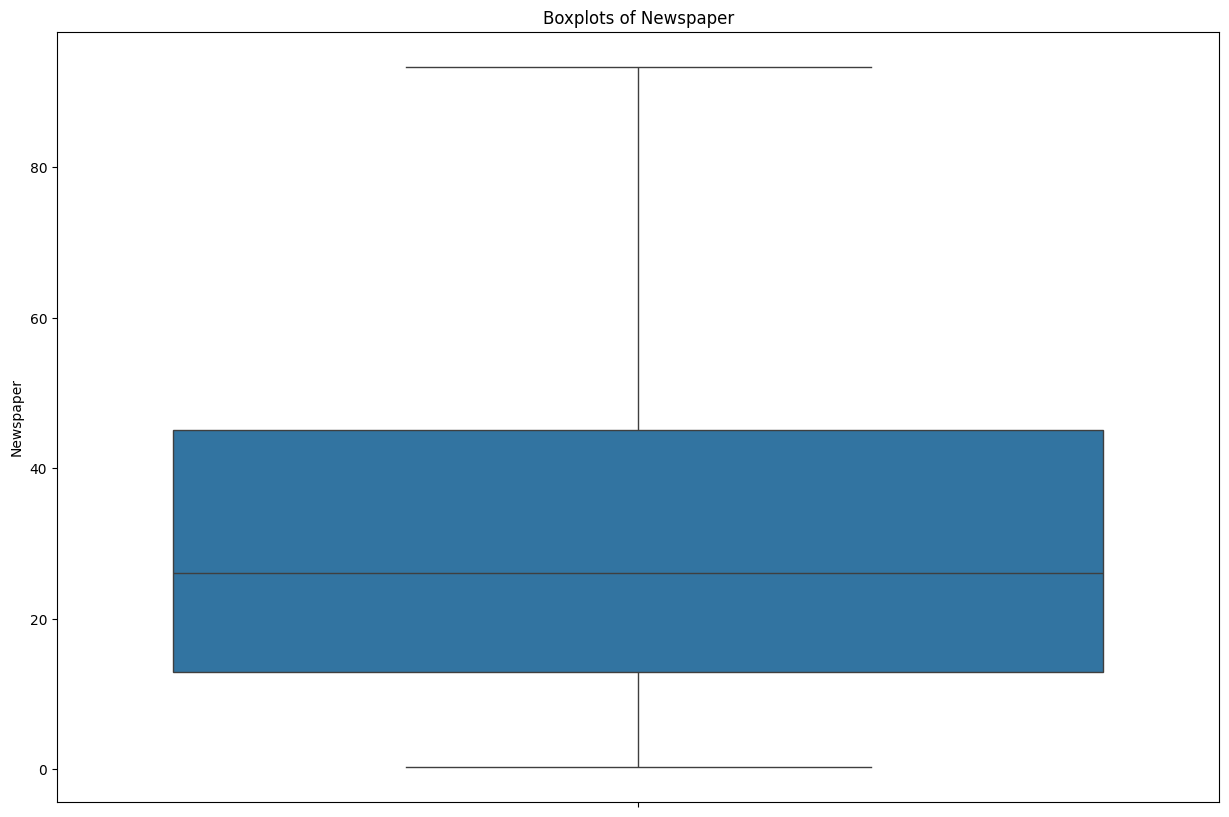

In [22]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data2['Newspaper'])
plt.title('Boxplots of Newspaper')
plt.show()

Try using mean and standard deviation (using data2)

In [24]:

upper_limit = data2['Newspaper'].mean() + 3*data2['Newspaper'].std()

print(upper_limit)

lower_limit = data2['Newspaper'].mean() - 3*data2['Newspaper'].std()

print(lower_limit)


data2['Newspaper'] = np.where(data2['Newspaper'] > upper_limit,

   upper_limit,

   np.where(

       data2['Newspaper'] < lower_limit,

       lower_limit,

       data2['Newspaper']

   )

)


94.99507681197984
-33.61636394069272


Correlation

In [25]:
# Check correlation for numerical columns
correlation_matrix = data.corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.037702   0.037885  0.764402
Radio      0.037702  1.000000   0.356645  0.572851
Newspaper  0.037885  0.356645   1.000000  0.228163
Sales      0.764402  0.572851   0.228163  1.000000


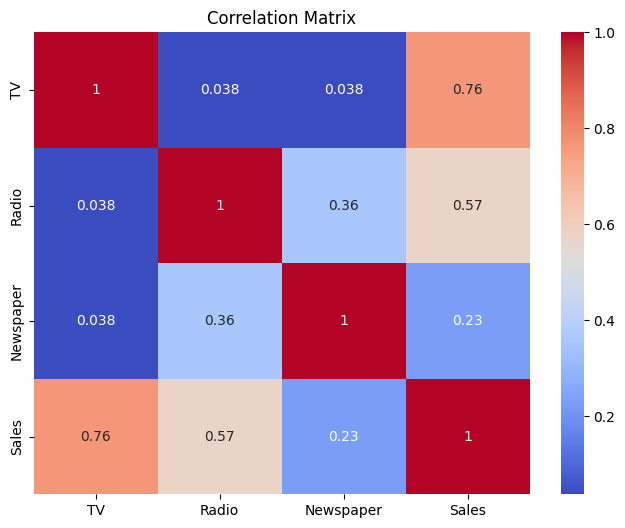

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

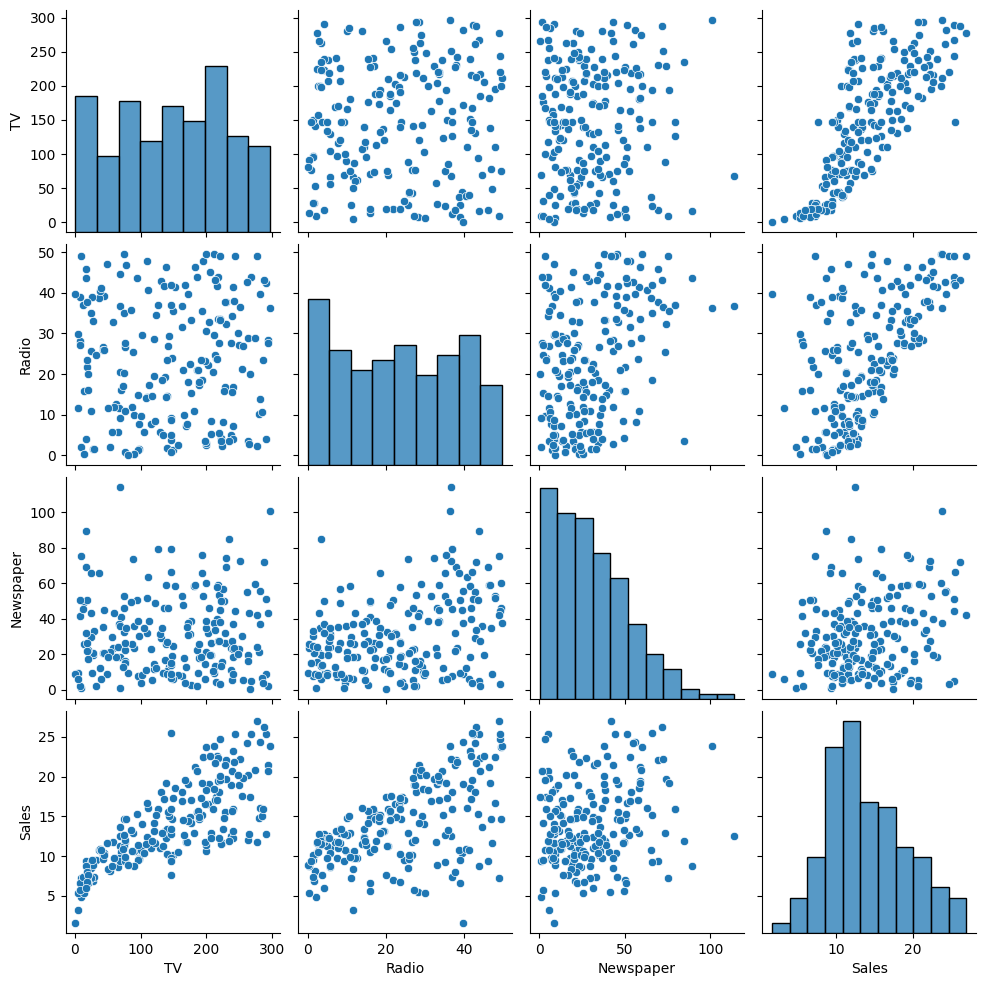

In [27]:
# Pairplot of numerical variables
sns.pairplot(data)
plt.show()